## **DATA ANALYSIS AND DATA CLEANING**

IMPORTING LIBRARIES AND RAW DATA

In [39]:
import pandas as pd
import numpy as np
import datetime, pytz

In [40]:
df = pd.read_csv(r'/content/cinemaTicket_Ref.csv')

DESCRIBE DATA

In [41]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [43]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

CHECK FOR NULL VALUES 

In [44]:
df.isnull().any()

film_code       False
cinema_code     False
total_sales     False
tickets_sold    False
tickets_out     False
show_time       False
occu_perc        True
ticket_price    False
ticket_use      False
capacity         True
date            False
month           False
quarter         False
day             False
dtype: bool

In [45]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

DROP NULL VALUES

In [46]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [47]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [48]:
#Check the Dataset after drop duplicated rows, null value and unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142524 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142524 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


## **Data Visualization**

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df['date'] = pd.to_datetime(df.date)
df['month']= df.date.dt.month
df['week']=df.date.dt.isocalendar().week
df['day']=df.date.dt.day
df['quarter']=df.date.dt.quarter
df['weekDay'] =df.date.dt.weekday

TOTAL SALES

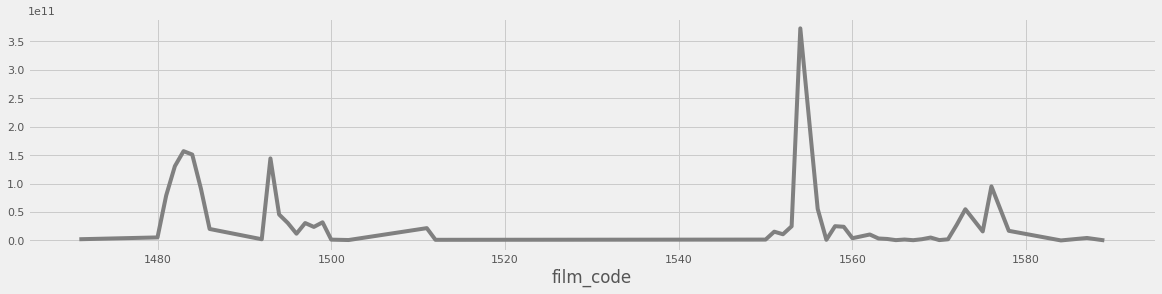

In [51]:
plt.style.use('fivethirtyeight')
df.groupby('film_code')['total_sales'].sum().plot(figsize=(18, 4), color='grey')

In [52]:
df.ticket_price.describe()

count    142524.000000
mean      81234.599886
std       33236.599278
min         483.870968
25%       60000.000000
50%       79454.235185
75%      100000.000000
max      700000.000000
Name: ticket_price, dtype: float64

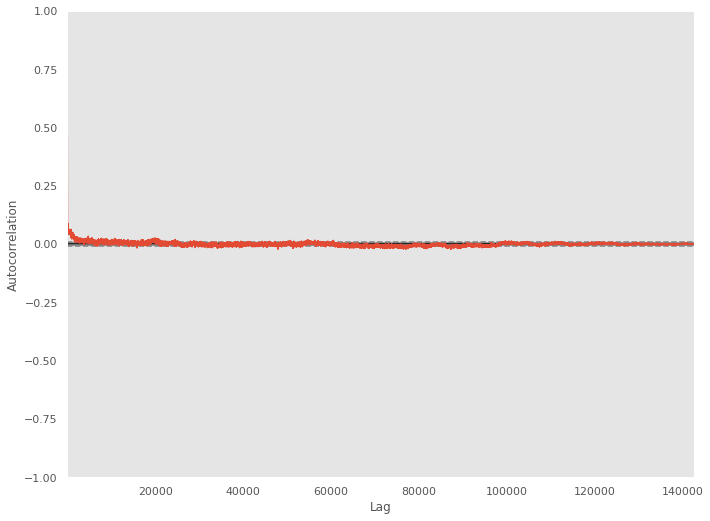

In [53]:
sns.set()
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
pd.plotting.autocorrelation_plot(df['ticket_price']) 

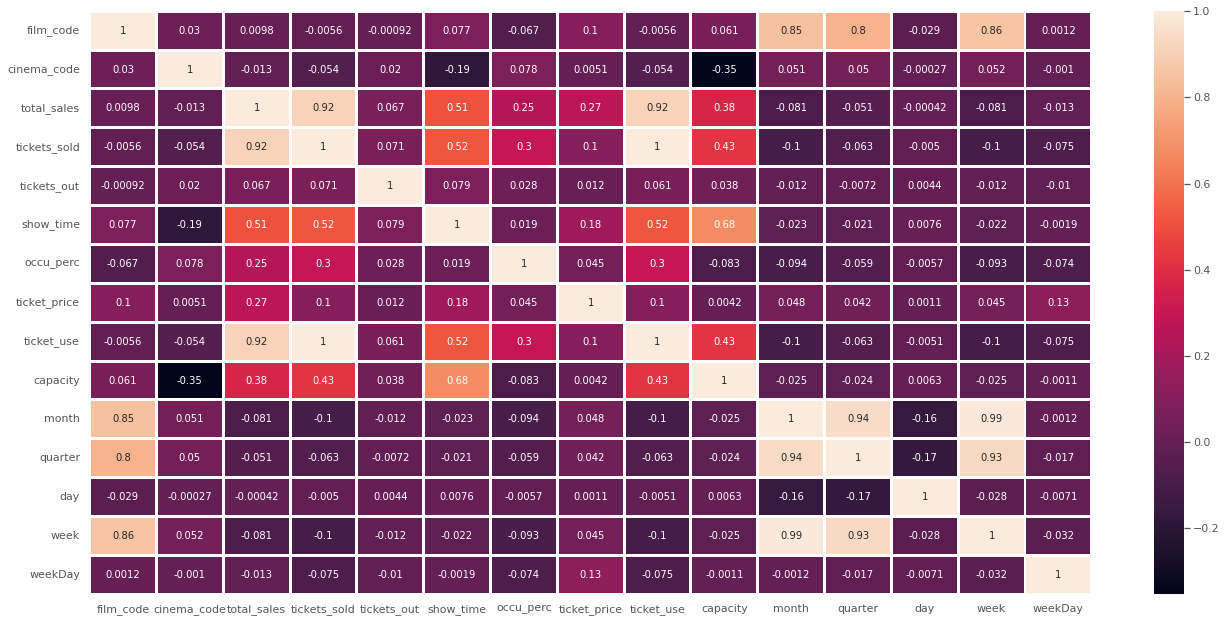

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True ,linewidths = 2,linecolor = "white")
plt.show()

In [55]:
df.corr()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day,week,weekDay
film_code,1.000000,0.029530,0.009802,-0.005588,-0.000920,0.076670,-0.067153,0.104820,-0.005582,0.061178,0.851380,0.800933,-0.028686,0.858211,0.001211
cinema_code,0.029530,1.000000,-0.012910,-0.053716,0.019534,-0.187125,0.078244,0.005079,-0.053957,-0.353127,0.051027,0.049646,-0.000270,0.051623,-0.001010
total_sales,0.009802,-0.012910,1.000000,0.915176,0.066810,0.509812,0.254471,0.272450,0.915112,0.375715,-0.080568,-0.051433,-0.000424,-0.081323,-0.012581
tickets_sold,-0.005588,-0.053716,0.915176,1.000000,0.071498,0.522088,0.300019,0.103596,0.999946,0.425181,-0.103477,-0.062666,-0.005037,-0.103308,-0.074746
tickets_out,-0.000920,0.019534,0.066810,0.071498,1.000000,0.078860,0.027550,0.011916,0.061091,0.037596,-0.012448,-0.007210,0.004441,-0.011693,-0.010408
show_time,0.076670,-0.187125,0.509812,0.522088,0.078860,1.000000,0.018741,0.176274,0.521625,0.681379,-0.023297,-0.020643,0.007646,-0.022417,-0.001857
occu_perc,-0.067153,0.078244,0.254471,0.300019,0.027550,0.018741,1.000000,0.045034,0.299939,-0.083438,-0.093695,-0.059355,-0.005723,-0.093477,-0.073812
ticket_price,0.104820,0.005079,0.272450,0.103596,0.011916,0.176274,0.045034,1.000000,0.103544,0.004245,0.048007,0.042031,0.001113,0.044940,0.132529
ticket_use,-0.005582,-0.053957,0.915112,0.999946,0.061091,0.521625,0.299939,0.103544,1.000000,0.425082,-0.103418,-0.062634,-0.005087,-0.103258,-0.074689
capacity,0.061178,-0.353127,0.375715,0.425181,0.037596,0.681379,-0.083438,0.004245,0.425082,1.000000,-0.025269,-0.023948,0.006258,-0.024621,-0.001150


In [56]:
df = df.drop(['cinema_code','tickets_out','occu_perc','date', 'month', 'quarter'],axis=1)

In [57]:
df['capacity'].astype(np.int64)
df['capacity'] = df['capacity'].fillna(0).astype(np.int64)
df['day'].astype(np.int64)
df['day'] = df['day'].fillna(0).astype(np.int64)
df['ticket_price'].astype(np.int64)
df['ticket_price'] = df['ticket_price'].fillna(0).astype(np.int64)

Define Target Variable (y) and Feature Variables (x)

In [58]:
X = df[['total_sales','show_time','film_code','ticket_use','tickets_sold']]


In [59]:
X.shape

(142524, 5)

In [60]:
y = df['ticket_price']



In [61]:
y.shape

(142524,)

## **Train Test Split**

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.3, random_state=0)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42757, 5), (99767, 5), (42757,), (99767,))

## **MODEL**

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

In [68]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

### **Accuracy**

In [69]:
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))

Decision tree  Regression Model Score is  99
